In [ ]:
#PR7B: Graph-Based Clustering

In [41]:
extract_tarfile('/content/enron_mail_20150507.tar.gz')

In [11]:
import os
import networkx as nx
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
from email.parser import Parser
import numpy as np

def parse_emails(folder_path):
    email_files = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith("."):
                file_path = os.path.join(root, file)
                with open(file_path, 'r', errors='ignore') as f:
                    email_files.append(f.read())
    return email_files

def extract_communications(employee_dir):
    inbox_emails = parse_emails(os.path.join(employee_dir, 'inbox'))
    sent_emails = parse_emails(os.path.join(employee_dir, 'sent'))

    inbox_senders = []
    sent_receivers = []

    email_parser = Parser()

    for email in inbox_emails:
        parsed_email = email_parser.parsestr(email)
        if parsed_email['From']:
            inbox_senders.append(parsed_email['From'])

    for email in sent_emails:
        parsed_email = email_parser.parsestr(email)
        if parsed_email['To']:
            sent_receivers.append(parsed_email['To'])

    return inbox_senders, sent_receivers

def build_communication_graph(base_dir, sample_size=None):
    G = nx.Graph()

    employees = os.listdir(base_dir)

    if sample_size:
        employees = np.random.choice(employees, size=sample_size, replace=False)

    for employee in employees:
        employee_dir = os.path.join(base_dir, employee)
        if os.path.isdir(employee_dir):
            inbox_senders, sent_receivers = extract_communications(employee_dir)

            for sender in inbox_senders:
                G.add_edge(sender, employee)

            for receiver in sent_receivers:
                G.add_edge(employee, receiver)

    return G

base_dir = "/content/maildir"

sample_size = 20
G = build_communication_graph(base_dir, sample_size)

adj_matrix = nx.to_numpy_array(G)

n_clusters = 20
sc = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', random_state=42)
labels = sc.fit_predict(adj_matrix)

pos = nx.spring_layout(G)

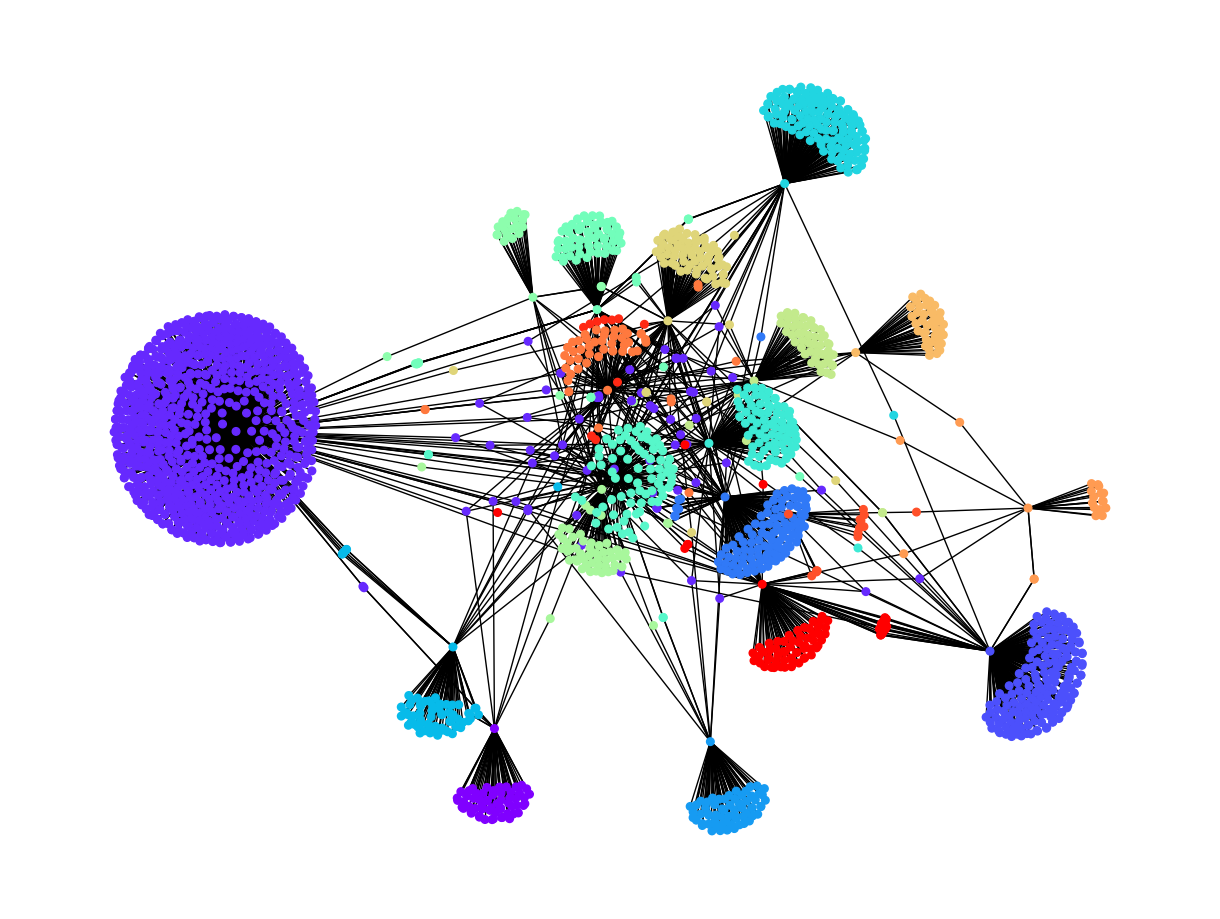

In [12]:
plt.figure(figsize=(12, 9))
nx.draw(G, node_color=labels, with_labels=False, node_size=30, cmap=plt.cm.rainbow)
plt.show()
